# Büchereien Wien's most frequently borrowed items in 2014 (Top 1000)

Source of the dataset: https://www.data.gv.at/katalog/de/dataset/stadt-wien_bchereienwienjahresbestleiher

In this notebook I want to explore the most popular books, CDs and DVDs in Vienna's public libraries: 

#### Introduction:
- Most popular authors: Who are the most borrowed authors based on the "Anzahl_Ausleihen" (Number of Checkouts) column?
- Most popular authors (in titles): Who are the most prolific authors in terms of the number of titles represented in the top 1000?
- Which authors are represented in the top 1000 with more than one book?
- Popular titles: Which books ("Titel") have the highest number of checkouts?
- Media group distribution: What is the distribution of media types ("Mediengruppe") in the library? Which media group is borrowed the most? What are the most popular titles per media group?

#### Inferring from names and titles:
- Which languages, apart from German, are most popular?
- Are there more female or male popular authors?
- Is there a correlation between the gender of an author and the popularity of their works?
- What are popular themes to be found in the titles?
- Is there a thematic trend in items related to big news stories? (https://en.wikipedia.org/wiki/2014)

#### Genres – the SYSTEMATIK column:
- Which genres are most popular?
- Genre diversity of authors: Do authors tend to stick to a specific genre, or do they write across various genres? Which of their genres is more popular?
- Which genres are popular among young readers? (J. Systematik)
- Are there popular cookbooks? What do people like to cook?
- Are there popular travel guides? Which regions are popular travel destinations?
- What non-fiction items are people interested in?


### Further analysis:
#### One hit wonders?
- Correlation between checkouts and titles: Is there a correlation between the number of checkouts and the number of titles an author has?
- Prolific Authors: Who are the most prolific authors in terms of the number of titles represented in the top 1000?

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# import geopandas as gpd
import os
# import folium
import langdetect
import gender_guesser.detector as gender
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud

## Introduction

In [132]:
# I placed the file of the dataset and this Jupyter Notebook in the same folder, so I'm using its relative path

bib = pd.read_csv("filervirtap4hat0001documents821_2014_bestleiher.csv", encoding="iso8859_15",sep=";") # my data is encoded in Latin-9 

bib.head(11)

,MEDIENNR,VERFASSERIN,TITEL,MEDIENGRUPPE,SYSTEMATIK,ANZAHL_AUSLEIHEN,ANZAHL_TITEL
0,1068688,"Kinney, Jeff",Geht's noch?,Buch,JE,1671,122
1,1097799,"Kinney, Jeff",Keine Panik!,Buch,JE,1658,116
2,971932,"Kinney, Jeff",Jetzt reicht's!,Buch,JE,1598,118
3,1013354,"Kinney, Jeff",Ich war's nicht!,Buch,JE,1518,109
4,920034,"Kinney, Jeff",Von Idioten umzingelt!,Buch,JE,1437,105
5,1152807,"Kinney, Jeff",Dumm gelaufen,Buch,JE,1382,99
6,938732,"Kinney, Jeff",Gibt's Probleme?,Buch,JE,1323,106
7,1198322,"Kinney, Jeff",Echt übel!,Buch,JE,1244,85
8,1068739,"Bornstädt, Matthias ¬von¬",Wickie wird entführt,Buch,JM.C,1074,76
9,1116806,"Bornstädt, Matthias ¬von¬",Wickie in der Klemme,Buch,JM.C,1072,78


In [133]:
# Making sure all my data has been read correctly

allrows_counts = bib["MEDIENNR"].count()
print (allrows_counts)

999


In [134]:
bib.dtypes 

MEDIENNR             int64
VERFASSERIN         object
TITEL               object
MEDIENGRUPPE        object
SYSTEMATIK          object
ANZAHL_AUSLEIHEN     int64
ANZAHL_TITEL         int64
dtype: object

#### Overview of columns in the dataset:
- **MEDIENNR**: Library internal identification number of the book.
- **VERFASSERIN**: Author(s) of the book, director(s) of the movie.
- **TITEL**: Book title, movie title.
- **MEDIENGRUPPE**: Type of item (e.g., book, CD, DVD).
- **SYSTEMATIK**: Library cataloging and classification.
- **ANZAHL_AUSLEIHEN**: Total number of loans for the year 2014.
- **ANZAHL_TITEL**: Total number of a given item in the library collection.

In [135]:
# Removing special character '¬' from 'TITEL' column

bib['TITEL'] = bib['TITEL'].str.replace('¬', '')
bib.head(11)

,MEDIENNR,VERFASSERIN,TITEL,MEDIENGRUPPE,SYSTEMATIK,ANZAHL_AUSLEIHEN,ANZAHL_TITEL
0,1068688,"Kinney, Jeff",Geht's noch?,Buch,JE,1671,122
1,1097799,"Kinney, Jeff",Keine Panik!,Buch,JE,1658,116
2,971932,"Kinney, Jeff",Jetzt reicht's!,Buch,JE,1598,118
3,1013354,"Kinney, Jeff",Ich war's nicht!,Buch,JE,1518,109
4,920034,"Kinney, Jeff",Von Idioten umzingelt!,Buch,JE,1437,105
5,1152807,"Kinney, Jeff",Dumm gelaufen,Buch,JE,1382,99
6,938732,"Kinney, Jeff",Gibt's Probleme?,Buch,JE,1323,106
7,1198322,"Kinney, Jeff",Echt übel!,Buch,JE,1244,85
8,1068739,"Bornstädt, Matthias ¬von¬",Wickie wird entführt,Buch,JM.C,1074,76
9,1116806,"Bornstädt, Matthias ¬von¬",Wickie in der Klemme,Buch,JM.C,1072,78


In [136]:
# Removing special character '¬' from 'VERFASSERIN' column

bib['VERFASSERIN'] = bib['VERFASSERIN'].str.replace('¬', '')
bib.head(11)

,MEDIENNR,VERFASSERIN,TITEL,MEDIENGRUPPE,SYSTEMATIK,ANZAHL_AUSLEIHEN,ANZAHL_TITEL
0,1068688,"Kinney, Jeff",Geht's noch?,Buch,JE,1671,122
1,1097799,"Kinney, Jeff",Keine Panik!,Buch,JE,1658,116
2,971932,"Kinney, Jeff",Jetzt reicht's!,Buch,JE,1598,118
3,1013354,"Kinney, Jeff",Ich war's nicht!,Buch,JE,1518,109
4,920034,"Kinney, Jeff",Von Idioten umzingelt!,Buch,JE,1437,105
5,1152807,"Kinney, Jeff",Dumm gelaufen,Buch,JE,1382,99
6,938732,"Kinney, Jeff",Gibt's Probleme?,Buch,JE,1323,106
7,1198322,"Kinney, Jeff",Echt übel!,Buch,JE,1244,85
8,1068739,"Bornstädt, Matthias von",Wickie wird entführt,Buch,JM.C,1074,76
9,1116806,"Bornstädt, Matthias von",Wickie in der Klemme,Buch,JM.C,1072,78


In [137]:
# 10 Most popular items
top10items = bib[["ANZAHL_AUSLEIHEN", "TITEL", "VERFASSERIN"]].sort_values(by="ANZAHL_AUSLEIHEN", ascending=False).head(10)
print(top10items)

   ANZAHL_AUSLEIHEN                   TITEL              VERFASSERIN
0              1671            Geht's noch?             Kinney, Jeff
1              1658            Keine Panik!             Kinney, Jeff
2              1598         Jetzt reicht's!             Kinney, Jeff
3              1518        Ich war's nicht!             Kinney, Jeff
4              1437  Von Idioten umzingelt!             Kinney, Jeff
5              1382           Dumm gelaufen             Kinney, Jeff
6              1323        Gibt's Probleme?             Kinney, Jeff
7              1244              Echt übel!             Kinney, Jeff
8              1074    Wickie wird entführt  Bornstädt, Matthias von
9              1072    Wickie in der Klemme  Bornstädt, Matthias von


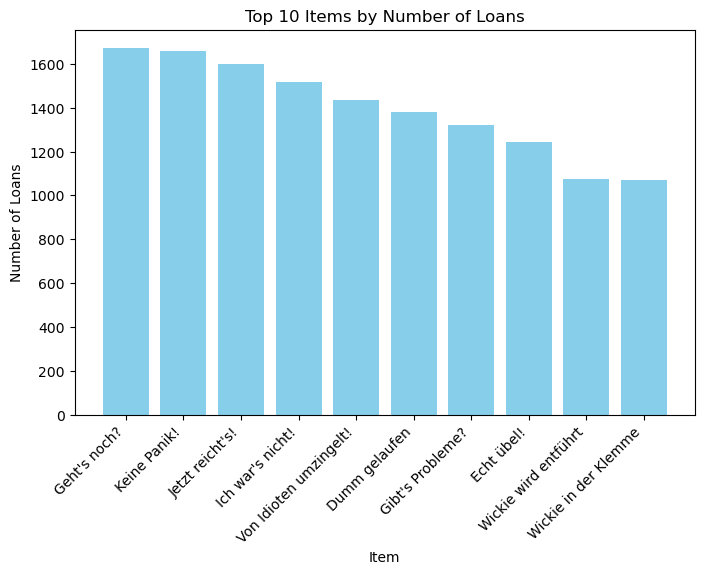

In [138]:
plt.figure(figsize=(8, 5))
plt.bar(top10items['TITEL'], top10items['ANZAHL_AUSLEIHEN'], color='skyblue')
plt.xlabel('Item')
plt.ylabel('Number of Loans')
plt.title('Top 10 Items by Number of Loans')
plt.xticks(rotation=45, ha='right')
plt.show()

In [139]:
# 10 Most popular authors by number of loans
top10authors = bib.groupby("VERFASSERIN")['ANZAHL_AUSLEIHEN'].sum().reset_index()
top10authors = top10authors.sort_values(by="ANZAHL_AUSLEIHEN", ascending=False).head(10)

print(top10authors)

               VERFASSERIN  ANZAHL_AUSLEIHEN
289     Osborne, Mary Pope             13394
353          Siegner, Ingo             13309
200           Kinney, Jeff             13172
179           Hunter, Erin             11758
392        Vogel, Maja von             11441
55          Chapman, Linda             10996
89           Dietl, Erhard             10834
285  Nöstlinger, Christine              8687
208                Knister              8124
37           Boehme, Julia              6381


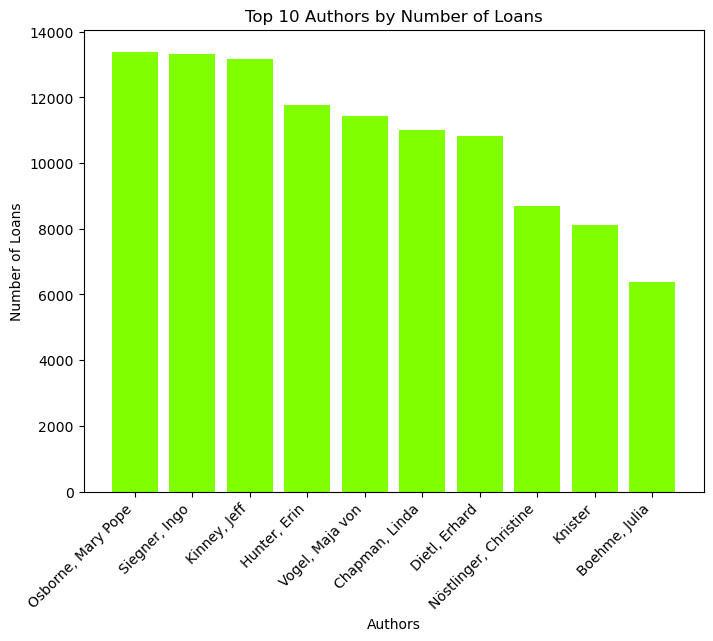

In [140]:
aggrtop10loans = bib.groupby("VERFASSERIN")['ANZAHL_AUSLEIHEN'].sum().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(top10authors['VERFASSERIN'], top10authors['ANZAHL_AUSLEIHEN'], color='chartreuse')
plt.xlabel('Authors')
plt.ylabel('Number of Loans')
plt.title('Top 10 Authors by Number of Loans')
plt.xticks(rotation=45, ha='right')
plt.show()

In [141]:
# 10 Most popular authors by number of titles

author_counts = bib['VERFASSERIN'].value_counts()
top10authors_titles = author_counts.head(10)
print(top10authors_titles)

VERFASSERIN
Chapman, Linda           32
Osborne, Mary Pope       30
Siegner, Ingo            27
Hunter, Erin             26
Dietl, Erhard            24
Vogel, Maja von          23
Knister                  21
Nöstlinger, Christine    21
Boehme, Julia            17
Gehm, Franziska          13
Name: count, dtype: int64


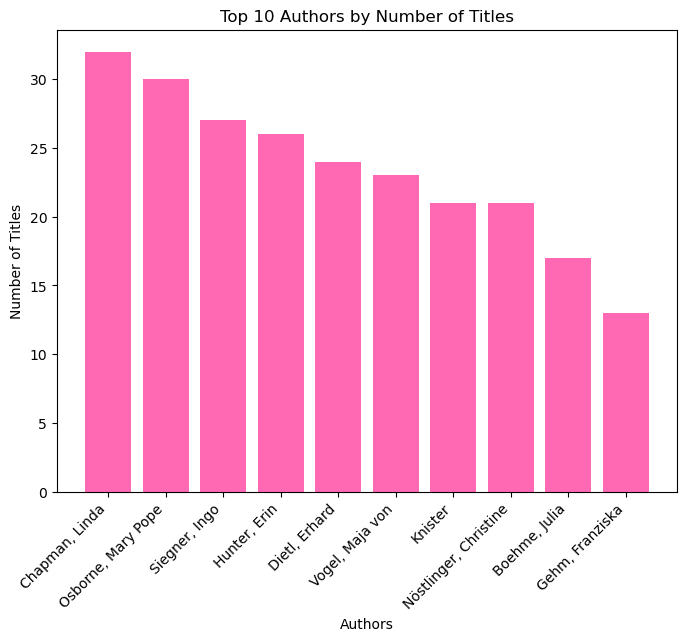

In [142]:
plt.figure(figsize=(8, 6))
plt.bar(top10authors_titles.index, top10authors_titles.values, color='hotpink')
plt.xlabel('Authors')
plt.ylabel('Number of Titles')
plt.title('Top 10 Authors by Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.show()

In [143]:
# Authors with more than one title in the Top 1000
author_counts = bib['VERFASSERIN'].value_counts()
filtered_authors = author_counts[author_counts > 1]
print(filtered_authors)

VERFASSERIN
Chapman, Linda        32
Osborne, Mary Pope    30
Siegner, Ingo         27
Hunter, Erin          26
Dietl, Erhard         24
                      ..
Mankell, Henning       2
Watt, Fiona            2
Follett, Ken           2
Brown, Dan             2
Beckett, Simon         2
Name: count, Length: 150, dtype: int64


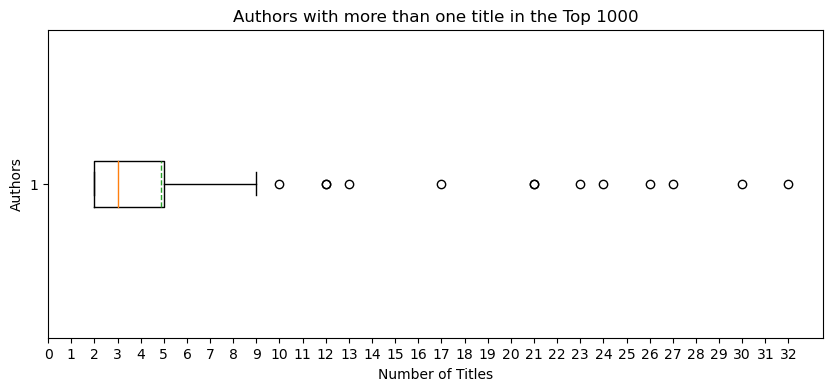

In [144]:
plt.figure(figsize=(10, 4))
plt.boxplot(filtered_authors, vert=False, showmeans=True, meanline=True)
plt.xlabel('Number of Titles')
plt.ylabel('Authors')
plt.title('Authors with more than one title in the Top 1000')
plt.xticks(range(0, max(filtered_authors) + 1))
plt.show()

In [145]:
# Which different types of items are available in public libraries?
mediumvc = bib.MEDIENGRUPPE.value_counts()
print (mediumvc)

MEDIENGRUPPE
Buch            934
DVD              54
Compact Disc     11
Name: count, dtype: int64


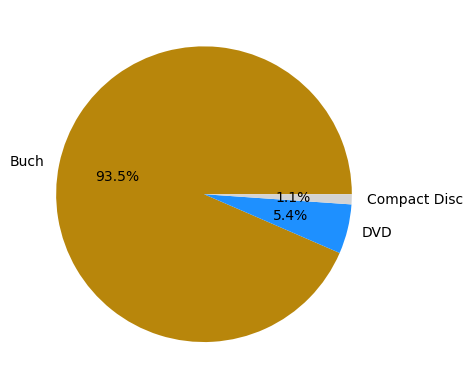

In [146]:
label_counts = bib['MEDIENGRUPPE'].value_counts()

unique_labels = label_counts.index
sizes = label_counts.values

fig, ax = plt.subplots()
ax.pie(sizes, labels=unique_labels, autopct='%1.1f%%', colors=['darkgoldenrod', 'dodgerblue', 'lightgray'])
plt.show()

Books are the most popular medium, followed by DVDs and CDs.

In [147]:
top_items_by_group = bib.groupby('MEDIENGRUPPE').apply(lambda group: group.nlargest(3, 'ANZAHL_AUSLEIHEN')).reset_index(drop=True)

print(top_items_by_group)

   MEDIENNR     VERFASSERIN                                             TITEL  \
0   1068688    Kinney, Jeff                                      Geht's noch?   
1   1097799    Kinney, Jeff                                      Keine Panik!   
2    971932    Kinney, Jeff                                   Jetzt reicht's!   
3   1184089    Hunter, Erin                                       Mitternacht   
4   1044436    Hunter, Erin                                    In die Wildnis   
5   1194140   Siegner, Ingo  Der kleine Drache Kokosnuss bei den Dinosauriern   
6   1223494    Allen, Woody                                      Blue Jasmine   
7   1198384   August, Bille                            Nachtzug nach Lissabon   
8   1214243  Enrico, Jérôme                                          Paulette   

   MEDIENGRUPPE SYSTEMATIK  ANZAHL_AUSLEIHEN  ANZAHL_TITEL  
0          Buch         JE              1671           122  
1          Buch         JE              1658           116  
2     

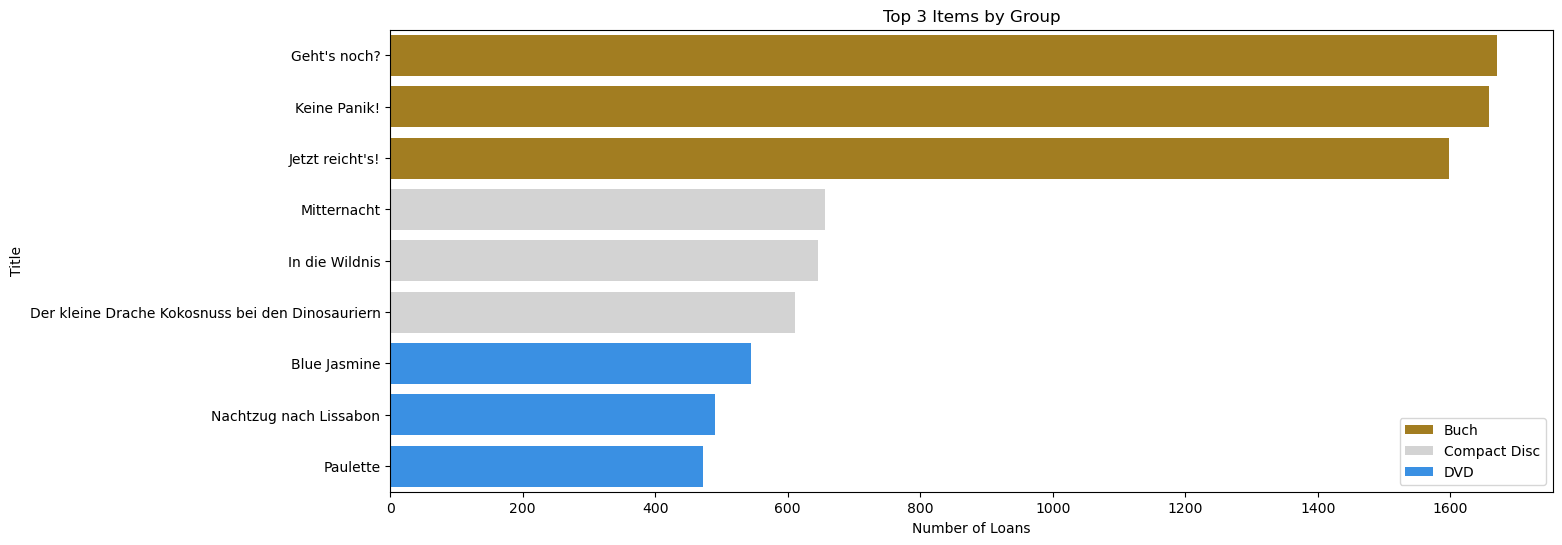

In [148]:
categories = top_items_by_group['MEDIENGRUPPE'].unique()

custom_colors = ['darkgoldenrod', 'lightgray', 'dodgerblue']

plt.figure(figsize=(15, 6))


for i, category in enumerate(categories):
    category_data = top_items_by_group[top_items_by_group['MEDIENGRUPPE'] == category]
    
    
    sns.barplot(x='ANZAHL_AUSLEIHEN', y='TITEL', data=category_data, color=custom_colors[i], label=category)

plt.legend(loc='lower right')

plt.title('Top 3 Items by Group')
plt.xlabel('Number of Loans')
plt.ylabel('Title')

plt.show()

In [149]:
ausleihmax = bib['ANZAHL_AUSLEIHEN'].max()
print(ausleihmax)

1671


In [150]:
ausleihmin = bib['ANZAHL_AUSLEIHEN'].min()
print(ausleihmin)

264


The book that was most often borrowed in 2014 was borrowed 1671 times. No popular book was borrowed less than 264 times.

In [151]:
ausleihmean_rounded = round(bib['ANZAHL_AUSLEIHEN'].mean())
print(ausleihmean_rounded)

388


On average, a book belonging to the top 1000 was borrowed 388 times.

#  Inferring from names and titles

## Languages

In [152]:
# This method is not reliable enough for short titles...

from langdetect import detect

titles = bib['TITEL']

# I create a new column 'detectedLANGUAGE' to store detected languages labels
bib['detectedLANGUAGE'] = titles.apply(lambda x: detect(x) if type(x) == str else None)

In [153]:
bib.head(21)

,MEDIENNR,VERFASSERIN,TITEL,MEDIENGRUPPE,SYSTEMATIK,ANZAHL_AUSLEIHEN,ANZAHL_TITEL,detectedLANGUAGE
0,1068688,"Kinney, Jeff",Geht's noch?,Buch,JE,1671,122,de
1,1097799,"Kinney, Jeff",Keine Panik!,Buch,JE,1658,116,et
2,971932,"Kinney, Jeff",Jetzt reicht's!,Buch,JE,1598,118,de
3,1013354,"Kinney, Jeff",Ich war's nicht!,Buch,JE,1518,109,de
4,920034,"Kinney, Jeff",Von Idioten umzingelt!,Buch,JE,1437,105,de
5,1152807,"Kinney, Jeff",Dumm gelaufen,Buch,JE,1382,99,de
6,938732,"Kinney, Jeff",Gibt's Probleme?,Buch,JE,1323,106,ca
7,1198322,"Kinney, Jeff",Echt übel!,Buch,JE,1244,85,de
8,1068739,"Bornstädt, Matthias von",Wickie wird entführt,Buch,JM.C,1074,76,de
9,1116806,"Bornstädt, Matthias von",Wickie in der Klemme,Buch,JM.C,1072,78,de


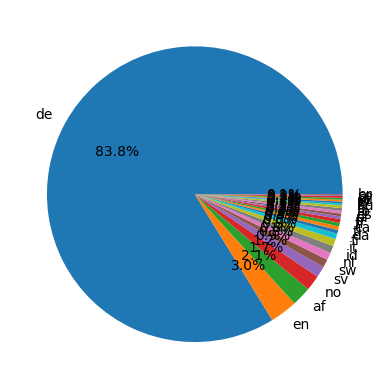

In [154]:
label_counts = bib['detectedLANGUAGE'].value_counts()

unique_labels = label_counts.index
sizes = label_counts.values

fig, ax = plt.subplots()
ax.pie(sizes, labels=unique_labels, autopct='%1.1f%%')
plt.show()

Automated language detection is not reliable enough for short titles.

Luckily, Viennese public libraries sort their items based on categories that reveal the languages and the genre of items.

WIENER SYSTEMATIK FÜR ÖFFENTLICHE BÜCHEREIEN: https://buechereien.wien.gv.at/Portals/0/Files/Wiener_Systematik_f_Oeffentliche_Buechereien_01_2023.pdf

In [155]:
FS_rows = bib[bib['SYSTEMATIK'].str.startswith(('FS', 'FS.'))]
print(FS_rows)
count_FSrows = len(bib[bib['SYSTEMATIK'].str.startswith(('FS', 'FS.'))])
print(f"Number of rows with values starting with 'FS' or 'FS.': {count_FSrows}")

     MEDIENNR  VERFASSERIN          TITEL MEDIENGRUPPE SYSTEMATIK  \
980   1122338  Moyes, Jojo  Me before you         Buch       FS.E   

     ANZAHL_AUSLEIHEN  ANZAHL_TITEL detectedLANGUAGE  
980               266            28               en  
Number of rows with values starting with 'FS' or 'FS.': 1


There is only one book among the top 1000 books that is grouped under 'FOREIGN LANGUAGES' (FS = FREMDSPRACHIGE BÜCHER) by the public library. The book is "Me before you" by Jojo Moyes.

## Genres

In [156]:
# Which SYSTEMATIK labels are represented in the top 1000?
systematikvc = bib.SYSTEMATIK.value_counts()
print (systematikvc)

SYSTEMATIK
DR.D      134
JM         83
DR         74
JE.C       74
JM.C       70
         ... 
DR.S        1
GE.OZ       1
EH.W        1
GE.HWO      1
JE.L        1
Name: count, Length: 108, dtype: int64


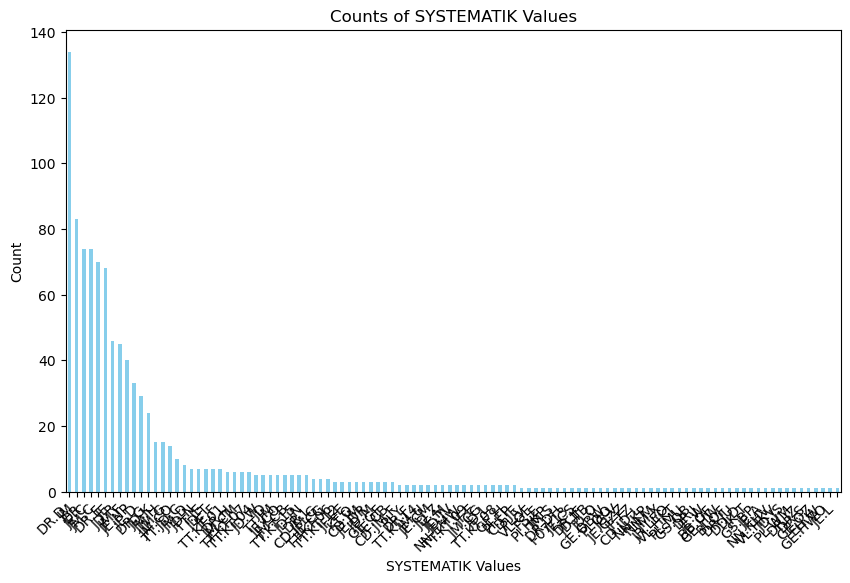

In [157]:
systematikvc = bib['SYSTEMATIK'].value_counts()

plt.figure(figsize=(10, 6))
systematikvc.plot(kind='bar', color='skyblue')
plt.title('Counts of SYSTEMATIK Values')
plt.xlabel('SYSTEMATIK Values')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Too much detail.

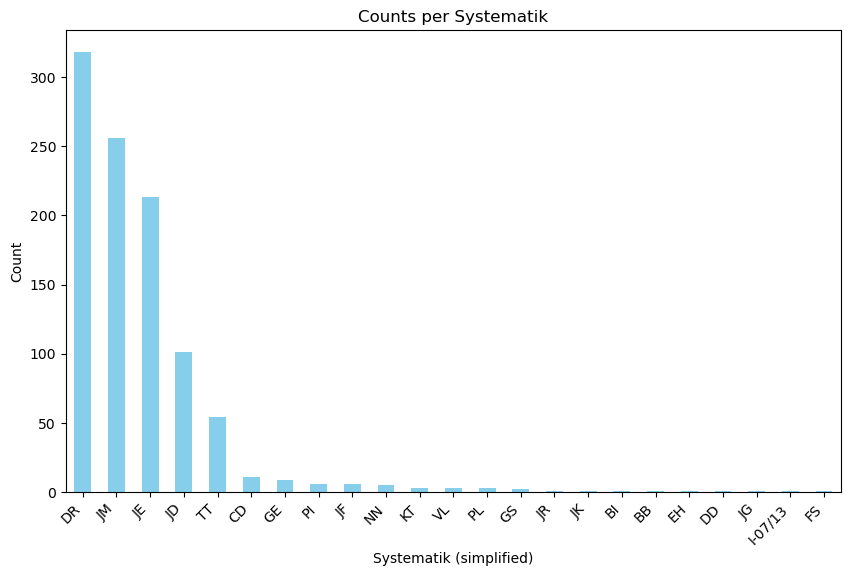

In [158]:
bib['simplifiedSYSTEMATIK'] = bib['SYSTEMATIK'].str.split('.').str[0] #creating a new column 'simplifiedSYSTEMATIK'

# For 'simplifiedSYSTEMATIK', I am extracting the part before the first dot of each value in the 'SYSTEMATIK' column, because the part after the dot is
# is used by the libraries to give more information/ a subgenre for a genre. For the above example FS.E, FS tells us that the book is a book in a foreign
# language (FremdSprache), .E reveals that this language is English.

simplifiedSYSTEMATIKvc = bib['simplifiedSYSTEMATIK'].value_counts()

plt.figure(figsize=(10, 6))
simplifiedSYSTEMATIKvc.plot(kind='bar', color='skyblue')
plt.title('Counts per Systematik')
plt.xlabel('Systematik (simplified)')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

The most popular genres are DR (novels, short stories, novellas), JM (fairy tales, legends, fantasy), JE (books for young readers), JD (picture books) and TT (DVDs).

In [159]:
bib.head(11) # with the added column

,MEDIENNR,VERFASSERIN,TITEL,MEDIENGRUPPE,SYSTEMATIK,ANZAHL_AUSLEIHEN,ANZAHL_TITEL,detectedLANGUAGE,simplifiedSYSTEMATIK
0,1068688,"Kinney, Jeff",Geht's noch?,Buch,JE,1671,122,de,JE
1,1097799,"Kinney, Jeff",Keine Panik!,Buch,JE,1658,116,et,JE
2,971932,"Kinney, Jeff",Jetzt reicht's!,Buch,JE,1598,118,de,JE
3,1013354,"Kinney, Jeff",Ich war's nicht!,Buch,JE,1518,109,de,JE
4,920034,"Kinney, Jeff",Von Idioten umzingelt!,Buch,JE,1437,105,de,JE
5,1152807,"Kinney, Jeff",Dumm gelaufen,Buch,JE,1382,99,de,JE
6,938732,"Kinney, Jeff",Gibt's Probleme?,Buch,JE,1323,106,ca,JE
7,1198322,"Kinney, Jeff",Echt übel!,Buch,JE,1244,85,de,JE
8,1068739,"Bornstädt, Matthias von",Wickie wird entführt,Buch,JM.C,1074,76,de,JM
9,1116806,"Bornstädt, Matthias von",Wickie in der Klemme,Buch,JM.C,1072,78,de,JM


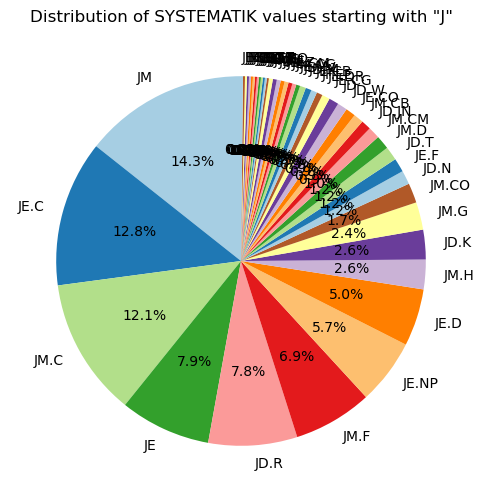

In [160]:
# Filter rows where 'SYSTEMATIK' starts with 'J' for the young readers genre
systematik_starts_with_J = bib[bib['SYSTEMATIK'].str.startswith('J')]

systematik_starts_with_J_counts = systematik_starts_with_J['SYSTEMATIK'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(systematik_starts_with_J_counts, labels=systematik_starts_with_J_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of SYSTEMATIK values starting with "J"')
plt.show()

**8 most popular genres of young readers are**:
- JM: Märchen, Sagen, Phantastisches Hier: Phantastische Erzählungen
- JE.C: Erstlesebücher: Realistisches
- JM.C: Erstlesebücher: Phantastisches
- JE: Realistische Literatur
- JD.R: Bilderbuch-Serien
- JM.F: Fantasy
- JE.NP: Pferdegeschichten
- JE.D: Kriminalromane
- JM.H: Hexengeschichten, Magie

In [161]:
# Filter rows where 'SYSTEMATIK' starts with 'VL' for cookbooks
systematik_starts_with_VL = bib[bib['SYSTEMATIK'].str.startswith('VL')]
print(systematik_starts_with_VL)

systematik_starts_with_VL_counts = systematik_starts_with_VL['SYSTEMATIK'].value_counts()
print(systematik_starts_with_VL_counts)

     MEDIENNR        VERFASSERIN  \
155   1198921      Oliver, Jamie   
337   1146696  Seiser, Katharina   
707   1160022   Ludwig, Bernhard   

                                              TITEL MEDIENGRUPPE SYSTEMATIK  \
155                           Cook clever mit Jamie         Buch     VL.HKT   
337                          Österreich vegetarisch         Buch     VL.HKV   
707  Die "Morgen darf ich essen, was ich will"-Diät         Buch      VL.GE   

     ANZAHL_AUSLEIHEN  ANZAHL_TITEL detectedLANGUAGE simplifiedSYSTEMATIK  
155               476            43               en                   VL  
337               396            41               de                   VL  
707               303            36               de                   VL  
SYSTEMATIK
VL.HKT    1
VL.HKV    1
VL.GE     1
Name: count, dtype: int64


Since there are only three cookbooks among the top 1000 books, we can not really say what Austrians liked to eat in 2014.

*Cook clever mit Jamie*/Datum der Erstveröffentlichung: 29. August 2013: 120 originelle Rezepte aus aller Welt, die wenig kosten und fantastisch schmecken. In seinem neuen Kochbuch verrät Jamie Oliver, wie Sie mit einem kleinen Budget echtes Wohlfühlessen zaubern, gesund und abwechslungsreich

In [162]:
# List of SYSTEMATIK for travel guides
travel = ['EL', 'EH', 'VS.BX', 'VS.IX', 'VS.RX']

filtered_systematik = bib[bib['SYSTEMATIK'].str.startswith(tuple(travel))]

systematik_counts = filtered_systematik['SYSTEMATIK'].value_counts()

print(filtered_systematik)

     MEDIENNR    VERFASSERIN                  TITEL MEDIENGRUPPE SYSTEMATIK  \
469   1168121  Ehrlich, Anna  Wien für kluge Kinder         Buch       EH.W   

     ANZAHL_AUSLEIHEN  ANZAHL_TITEL detectedLANGUAGE simplifiedSYSTEMATIK  
469               355            44               de                   EH  


In [163]:
nonfiction = ['AN', 'BB', 'BI', 'ER', 'GE', 'GM', 'GP', 'GR', 'GS', 'GW', 'KB', 'KM', 'KT', 'NK', 'NN', 'NT', 'PI', 'PN', 'PR', 'VB', 'VH', 'VL', 'VS', 'VW']

filtered_titles = bib[bib['SYSTEMATIK'].str.startswith(tuple(nonfiction))]['TITEL']

print(filtered_titles)

82                          Leb wohl, Schlaraffenland
134           Erkenne dich selbst und erschrick nicht
155                             Cook clever mit Jamie
171                                 Die Schlafwandler
191                              Ohne Leib, mit Seele
216                                          Alphabet
234                               Zuhause ist überall
238                                    Ich bin Malala
260                   Der Hase mit den Bernsteinaugen
264                                  Schöne Tage 1914
273                          Frauenpower auf Arabisch
319                                   Darm mit Charme
337                            Österreich vegetarisch
395                   Die Zahl, die aus der Kälte kam
456                                Es war ganz anders
492                                   Der Große Krieg
498         5 Dinge, die Sterbende am meisten bereuen
520                                    Wohllebengasse
524                         

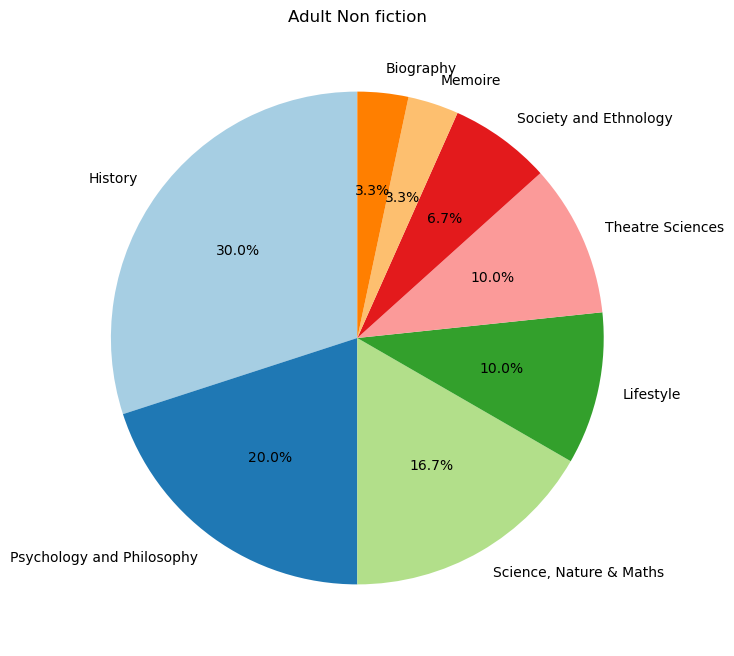

In [165]:
# List of prefixes and their corresponding labels
nonfiction_labels = {
    'AN': 'AN Label',
    'BB': 'Memoire',
    'BI': 'Biography',
    'ER': 'ER Label',
    'GE': 'History',
    'GM': 'GM Label',
    'GP': 'GP Label',
    'GR': 'GR Label',
    'GS': 'Society and Ethnology',
    'GW': 'GW Label',
    'KB': 'KB Label',
    'KM': 'KM Label',
    'KT': 'Theatre Sciences',
    'NK': 'NK Label',
    'NN': 'Science, Nature & Maths',
    'NT': 'NT Label',
    'PI': 'Psychology and Philosophy',
    'PN': 'PN Label',
    'PR': 'PR Label',
    'VB': 'VB Label',
    'VH': 'VH Label',
    'VL': 'Lifestyle',
    'VS': 'VS Label',
    'VW': 'VW Label',
}


filtered_systematik = bib[bib['SYSTEMATIK'].str.startswith(tuple(nonfiction_labels.keys()))]

systematik_counts = filtered_systematik['simplifiedSYSTEMATIK'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(systematik_counts, labels=[prefix_labels.get(prefix, prefix) for prefix in systematik_counts.index], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Adult Non fiction')
plt.show()

Die Hälfte der non-fiction Bücher sind Geschichtsbücher und Philosophie/Psychologie-Bücher.

## Gender

In [168]:
# Creating the gender detector
d = gender.Detector()


def get_gender(name):
    # we only want the first name after the comma
    parts = name.split(',')
    
    # using the second part of the split
    firstname = parts[1].strip() if len(parts) > 1 else parts[0].strip()
    
    return d.get_gender(firstname)

# Creating a new 'guessedGender' column
bib['guessedGender'] = bib['VERFASSERIN'].apply(get_gender)

In [169]:
guessedGendervc = bib['guessedGender'].value_counts()

print(guessedGendervc)

# 'andy' stands for 'androgynous'

guessedGender
male             406
female           368
unknown          177
mostly_female     32
mostly_male       11
andy               5
Name: count, dtype: int64


My 'firstname' doesn't take names such as 'Bornstädt, Matthias von' into account. This might explain the relatively high number of unknown names. 

I now want to get all elements in the VERFASSERIN column, where there is more than one blank space. This should give me all authours with multiple first names and names with nobiliary particle such as 'von' or 'del'.

In [170]:
unknown = bib[bib['guessedGender'] == 'unknown']['VERFASSERIN']

print(unknown)

8      Bornstädt, Matthias von
9      Bornstädt, Matthias von
10     Bornstädt, Matthias von
12     Schirach, Ferdinand von
15             Vogel, Maja von
                ...           
938         Osborne, Mary Pope
965         Forester, Cecil S.
975         Osborne, Mary Pope
980                Moyes, Jojo
986            Vogel, Maja von
Name: VERFASSERIN, Length: 177, dtype: object


In [171]:
# all elements in the VERFASSERIN where there is a total of more than one blank space ' '

difficultnames = bib[bib['VERFASSERIN'].str.count(' ') > 1]['VERFASSERIN']

print(difficultnames)

8      Bornstädt, Matthias von
9      Bornstädt, Matthias von
10     Bornstädt, Matthias von
12     Schirach, Ferdinand von
15             Vogel, Maja von
                ...           
937            Vogel, Maja von
938         Osborne, Mary Pope
965         Forester, Cecil S.
975         Osborne, Mary Pope
986            Vogel, Maja von
Name: VERFASSERIN, Length: 138, dtype: object


In [38]:
# better way to filter first names: firstname as the part of the string in VERFASSERIN that comes in between ', ' and ' '
# The code now uses the first part of the split after the comma (', '), then splits it again by space (' '), and takes the first element to get the first
# name.

def get_gender(name):
    parts = name.split(', ')
    firstname = parts[1].split(' ')[0] if len(parts) > 1 else parts[0].strip()
    
    return d.get_gender(firstname)

# updating 'guessedGender'
bib['guessedGender'] = bib['VERFASSERIN'].apply(get_gender)

In [39]:
unknownvc = bib[bib['guessedGender'] == 'unknown']['VERFASSERIN'].count()
print(unknownvc)

50


Before, there were 177 names with unknown gender. Now, there are only 50 such cases.

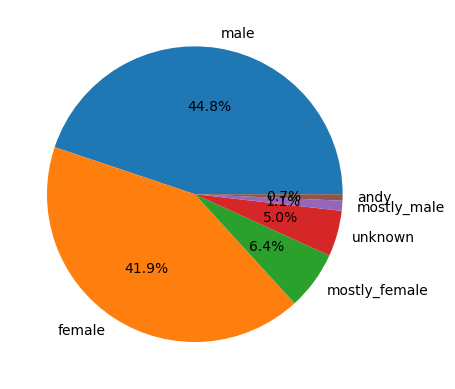

In [40]:
label_counts = bib['guessedGender'].value_counts()

unique_labels = label_counts.index
sizes = label_counts.values

fig, ax = plt.subplots()
ax.pie(sizes, labels=unique_labels, autopct='%1.1f%%')
plt.show()

In [41]:
mostly_female = bib[bib['guessedGender'] == 'mostly_female']['VERFASSERIN'].value_counts()

print(mostly_female)

# Every author here except for Jamie Oliver is indeed female. 

VERFASSERIN
Osborne, Mary Pope     30
Hunter, Erin           26
Clark, Mary Higgins     2
Oliver, Jamie           1
McDermid, Val           1
Child, Lauren           1
Weisberger, Lauren      1
Baeten, Lieve           1
McCreight, Kimberly     1
Name: count, dtype: int64


In [42]:
mostly_male = bib[bib['guessedGender'] == 'mostly_male']['VERFASSERIN'].value_counts()

print(mostly_male)

# Every author here except for Mo Hayder is indeed male.

VERFASSERIN
Child, Lee           3
Murakami, Haruki     2
Buck, Chris          1
Hayder, Mo           1
Daniels, Lee         1
Pratchett, Terry     1
Delafosse, Claude    1
Raimi, Sam           1
Name: count, dtype: int64


In [43]:
female = bib[(bib['guessedGender'] == 'mostly_female') | (bib['guessedGender'] == 'female')]['VERFASSERIN']

print(female)

11        Hunter, Erin
13        Hunter, Erin
15     Vogel, Maja von
16         Leon, Donna
18     Vogel, Maja von
            ...       
993       Sten, Viveca
994    Gehm, Franziska
996      Boehme, Julia
997       Rübel, Doris
998    Gehm, Franziska
Name: VERFASSERIN, Length: 483, dtype: object


In [44]:
male = bib[(bib['guessedGender'] == 'mostly_male') | (bib['guessedGender'] == 'male')]['VERFASSERIN']

print(male)

0            Kinney, Jeff
1            Kinney, Jeff
2            Kinney, Jeff
3            Kinney, Jeff
4            Kinney, Jeff
              ...        
988         Jarmusch, Jim
989            Coen, Joel
991      Bertram, Rüdiger
992    Dreller, Christian
995          Landy, Derek
Name: VERFASSERIN, Length: 459, dtype: object


In [172]:
# correlation gender and number of checkouts
from scipy.stats import chi2_contingency

female = bib[(bib['guessedGender'].isin(['mostly_female', 'female']))]
male = bib[(bib['guessedGender'].isin(['mostly_male', 'male']))]

contingency_table = pd.crosstab(bib['guessedGender'], bib['ANZAHL_AUSLEIHEN'])

# Chi-squared test
chi2_stat, _, _, _ = chi2_contingency(contingency_table)

# Cramer's V (manually)
n = contingency_table.sum().sum()  # Total number of observations
min_dim = min(contingency_table.shape) - 1  # Minimum dimension of the contingency table
cramers_v_value = np.sqrt(chi2_stat / (n * min_dim))

# results
print(f'Chi-squared statistic: {chi2_stat}')
print(f'Cramer\'s V value: {cramers_v_value:.3f}')

# Check for significance based on chi-squared test (common alpha levels are 0.05 or 0.01)
alpha = 0.05
if chi2_stat < alpha:
    print('The chi-squared test indicates a significant association.')
else:
    print('The chi-squared test does not indicate a significant association.')

# Interpretation of size of Cramer's V
v_size = 'small' if abs(cramers_v_value) < 0.1 else ('medium' if abs(cramers_v_value) < 0.3 else 'large')
print(f'Cramer\'s V size: {v_size}')

Chi-squared statistic: 1639.9755762568975
Cramer's V value: 0.573
The chi-squared test does not indicate a significant association.
Cramer's V size: large


_**Hmmm**_: Although the chi-squared test doesn't suggest  a significant association between gender of the author and popularity of their book, the large Cramer's V value indicates a strong association.

## Themes

In [46]:
title_list = bib['TITEL'].str.split().explode().tolist()

In [47]:
stop_words_english = set(stopwords.words('english'))
stop_words_german = set(stopwords.words('german'))
all_stop_words = stop_words_english.union(stop_words_german)

filtered_title_list = [word for word in title_list if word.lower() not in all_stop_words]

freqlist = Counter(filtered_title_list)

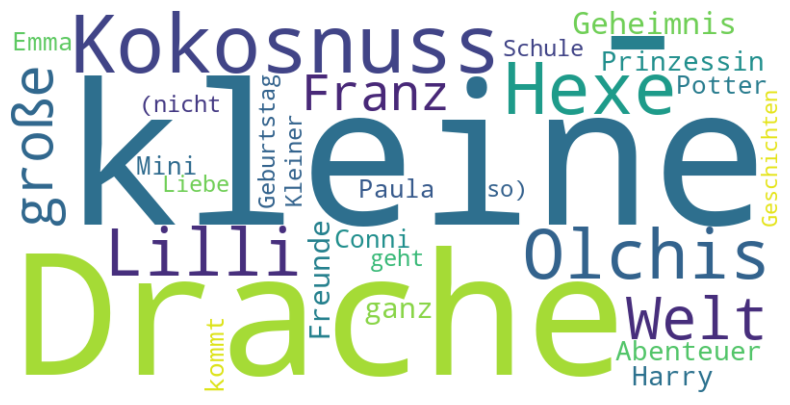

In [48]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(freqlist.most_common(30)))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.show()

A word cloud displaying the 30 most common words in borrowed titles.

In [49]:
# List of keywords
events_keywords = ['Islamischer Staat', 'Krim', 'Ebola', 'Malala Yousafzai']

# Count occurrences of political keywords in book titles
for keyword in events_keywords:
    bib[keyword] = bib['TITEL'].str.contains(keyword, case=False)

# Count the frequency of each keyword
keyword_counts = bib[events_keywords].sum()
print(keyword_counts)

Islamischer Staat    0
Krim                 2
Ebola                0
Malala Yousafzai     0
dtype: int64


In [50]:
# Identify hits based on the presence of keyword
hits = bib[bib[events_keywords].any(axis=1)]

# Display the titles of hits
print(hits['TITEL'])

458                 Krimigeschichten
961    Krimigeschichten zum Mitraten
Name: TITEL, dtype: object


In [51]:
# List of keywords
culture_keywords = ['Stuart Hall', 'Maya Angelou', 'Gabriel García Márquez', 'Bertha von Suttner', 'Udo Jürgens']

# Count occurrences of political keywords in book titles
for keyword in culture_keywords:
    bib[keyword] = bib['TITEL'].str.contains(keyword, case=False)

# Count the frequency of each keyword
keyword_counts = bib[culture_keywords].sum()
print(keyword_counts)

Stuart Hall               0
Maya Angelou              0
Gabriel García Márquez    0
Bertha von Suttner        0
Udo Jürgens               0
dtype: int64


In [52]:
# List of keywords
culture_keywords = ['Stuart Hall', 'Maya Angelou', 'Gabriel García Márquez', 'Bertha von Suttner', 'Udo Jürgens']

# Count occurrences of political keywords in book titles
for keyword in culture_keywords:
    bib[keyword] = bib['VERFASSERIN'].str.contains(keyword, case=False)

# Count the frequency of each keyword
keyword_counts = bib[culture_keywords].sum()
print(keyword_counts)

Stuart Hall               0
Maya Angelou              0
Gabriel García Márquez    0
Bertha von Suttner        0
Udo Jürgens               0
dtype: int64


# Further Analysis

In [178]:
# Group by Authors and calculate total titles and checkouts
author_stats = bib.groupby('VERFASSERIN').agg({'TITEL': 'count', 'ANZAHL_AUSLEIHEN': 'sum'}).reset_index()

# Compare checkouts for authors with more books to those with just one book
more_than_one_book = author_stats[author_stats['TITEL'] > 1]
one_book = author_stats[author_stats['TITEL'] == 1]

# Display the comparison
print("Authors with more than one book:")
print(more_than_one_book[['VERFASSERIN', 'TITEL', 'ANZAHL_AUSLEIHEN']])

print("\nAuthors with just one book:")
print(one_book[['VERFASSERIN', 'TITEL', 'ANZAHL_AUSLEIHEN']])

Authors with more than one book:
            VERFASSERIN  TITEL  ANZAHL_AUSLEIHEN
0         Abedi, Isabel      2               582
1     Addai, Patrick K.      3              1057
2    Adler-Olsen, Jussi      6              2762
3        Ahern, Cecelia      2               808
6          Allen, Woody      2               870
..                  ...    ...               ...
396      Wandrey, Guido      3              1060
398         Watt, Fiona      2               822
403     Wich, Henriette      6              1935
404     Widmark, Martin      5              1624
405    Wiechmann, Heike      2               537

[150 rows x 3 columns]

Authors with just one book:
                     VERFASSERIN  TITEL  ANZAHL_AUSLEIHEN
4                Ahrens, Henning      1               482
5              Aichner, Bernhard      1               518
7                Allende, Isabel      1               327
8                 Allert, Judith      1               299
9    Angermayer, Karen Christine    

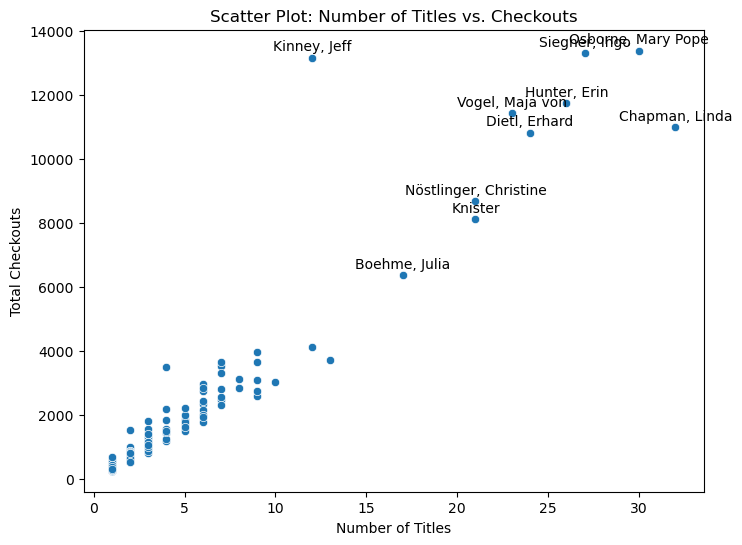

Pearson Correlation Coefficient: 0.96


In [179]:
# Group by Authors, total titles and checkouts
author_stats = bib.groupby('VERFASSERIN').agg({'TITEL': 'count', 'ANZAHL_AUSLEIHEN': 'sum'}).reset_index()

# threshold for labeling data points
threshold_checkouts = 5000
labeled_authors = author_stats[author_stats['ANZAHL_AUSLEIHEN'] > threshold_checkouts]

# Pearson's r correlation coefficient
correlation = author_stats['TITEL'].corr(author_stats['ANZAHL_AUSLEIHEN'])


plt.figure(figsize=(8, 6))
sns.scatterplot(x='TITEL', y='ANZAHL_AUSLEIHEN', data=author_stats)

# labeling
for index, row in labeled_authors.iterrows():
    plt.annotate(row['VERFASSERIN'], (row['TITEL'], row['ANZAHL_AUSLEIHEN']), textcoords="offset points", xytext=(0,5), ha='center')

plt.title(f'Scatter Plot: Number of Titles vs. Checkouts')
plt.xlabel('Number of Titles')
plt.ylabel('Total Checkouts')
plt.show()

print(f"Pearson Correlation Coefficient: {correlation:.2f}")

Correlation between checkouts and titles: There is a correlation between the number of checkouts and the number of titles an author has. The more different titles an author has in the Top 1000, the more frequently their books are borrowed.

In [180]:
author_systematik_counts = bib.groupby('VERFASSERIN')['SYSTEMATIK'].nunique()

# Filter authors with more than one unique value in 'SYSTEMATIK'
authors_with_different_systematik = author_systematik_counts[author_systematik_counts > 1].index.tolist()

print(authors_with_different_systematik)

['Addai, Patrick K.', 'Ahern, Cecelia', 'Beckett, Simon', 'Beer, Hans de', 'Bertram, Rüdiger', 'Blade, Adam', 'Blyton, Enid', 'Boehme, Julia', 'Boie, Kirsten', 'Bornstädt, Matthias von', 'Brezina, Thomas', 'Camilleri, Andrea', 'Chidolue, Dagmar', 'Collins, Suzanne', 'Dahl, Arne', 'Dietl, Erhard', 'Eco, Umberto', 'Edwardson, Åke', 'Funke, Cornelia', 'Gehm, Franziska', 'Geisler, Dagmar', 'Gerritsen, Tess', 'Gier, Kerstin', 'Glattauer, Daniel', 'Haas, Wolf', 'Hout, Mies van', 'Hunter, Erin', 'Huppertz, Nikola', 'King, Stephen', 'Kinney, Jeff', 'Knister', 'Kürthy, Ildikó von', 'Landy, Derek', 'Lind, Hera', 'Lindgren, Astrid', 'Link, Charlotte', 'Maar, Paul', 'Mai, Manfred', 'Mankell, Henning', 'Mauz, Christoph', 'Moyes, Jojo', 'Nahrgang, Frauke', 'Neuhaus, Nele', 'Nieländer, Peter', 'Nordqvist, Sven', 'Nöstlinger, Christine', 'Ondracek, Claudia', 'Osborne, Mary Pope', 'Pfister, Marcus', 'Preußler, Otfried', 'Reider, Katja', 'Riordan, Rick', 'Roberts, Nora', 'Rowling, Joanne K.', 'Rübel, Do

In [181]:
# top 333 authors based on 'ANZAHL_AUSLEIHE'
top_authors = bib.nlargest(333, 'ANZAHL_AUSLEIHEN')['VERFASSERIN']

# percentage of authors with different 'SYSTEMATIK' in the top 333
percentage_in_top_333 = (len(set(authors_with_different_systematik) & set(top_authors)) / len(authors_with_different_systematik)) * 100

# result
print(f'{percentage_in_top_333:.2f}% of authors, spanning various genres, are represented among the upper third of the most frequently borrowed items.')


72.73% of authors, spanning various genres, are represented among the upper third of the most frequently borrowed items.


In [182]:
titles_per_author = bib['VERFASSERIN'].value_counts()

# percentage of authors with more than one title
percentage_more_than_one_title = (titles_per_author > 1).sum() / len(titles_per_author) * 100

print(f"Percentage of authors with more than one title in top 1000: {percentage_more_than_one_title:.2f}%")

Percentage of authors with more than one title in top 1000: 36.06%


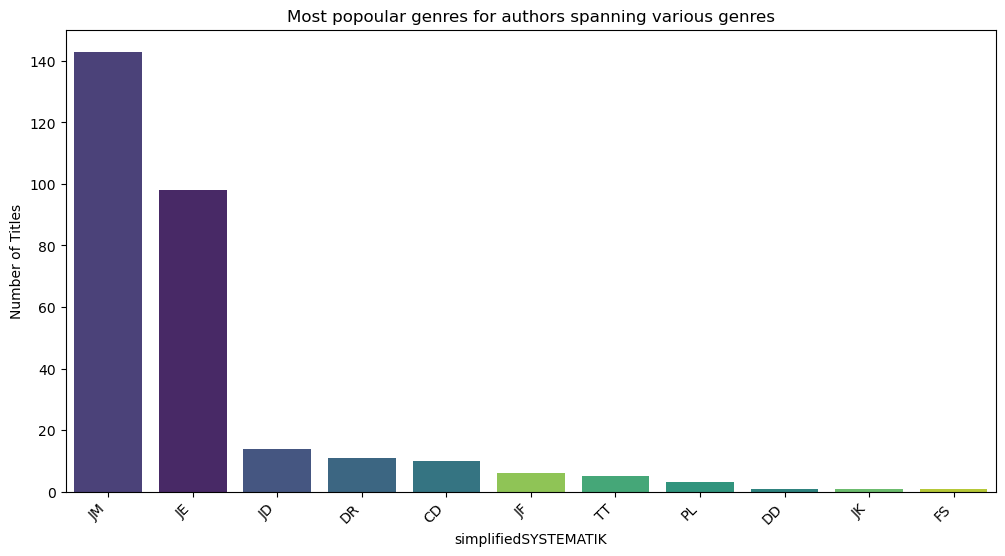

In [98]:
author_systematik_counts = bib.groupby('VERFASSERIN')['simplifiedSYSTEMATIK'].nunique()

# authors with more than one unique value in 'simplifiedSYSTEMATIK'
authors_with_different_systematik = author_systematik_counts[author_systematik_counts > 1].index

# Filter DataFrame for authors with different 'simplifiedSYSTEMATIK'
filtered_df = bib[bib['VERFASSERIN'].isin(authors_with_different_systematik)]

# visualize the distribution of most popular 'simplifiedSYSTEMATIK'
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='simplifiedSYSTEMATIK', order=filtered_df['simplifiedSYSTEMATIK'].value_counts().index, hue='simplifiedSYSTEMATIK', palette='viridis', legend=False)
plt.xticks(rotation=45, ha='right')
plt.xlabel('simplifiedSYSTEMATIK')
plt.ylabel('Number of Titles')
plt.title('Most popoular genres for authors spanning various genres')
plt.show()

Differences:

Overall
DR: ROMANE, ERZÄHLUNGEN, NOVELLEN and TT ... DVD-Video are more popular.

For authors spanning various genres the literature for young readers trend is even more obvious. (?) Eher Belletristik trend??
JM: Märchen, Sagen, Phantastisches
JE: Realistische Literatur
JD: Bilderbücher

In [183]:
# SYSTEMATIK with the highest ANZAHL_AUSLEIHEN for each VERFASSERIN who has more than one TITEL

authors_with_more_than_one_title = bib['VERFASSERIN'].value_counts()[bib['VERFASSERIN'].value_counts() > 1].index

result_list = []

for author in authors_with_more_than_one_title:
    author_data = bib[bib['VERFASSERIN'] == author]
    
    # row with maximum ANZAHL_AUSLEIHEN for each author
    max_row = author_data.loc[author_data['ANZAHL_AUSLEIHEN'].idxmax()]
    
    # Append the result to the list
    result_list.append(max_row[['VERFASSERIN', 'SYSTEMATIK', 'ANZAHL_AUSLEIHEN']].to_dict())

# Converting list to a DataFrame
result_df = pd.DataFrame(result_list)

print(result_df)

            VERFASSERIN SYSTEMATIK  ANZAHL_AUSLEIHEN
0        Chapman, Linda      JE.NP               432
1    Osborne, Mary Pope         JM               640
2         Siegner, Ingo         JM               774
3          Hunter, Erin       JM.F               888
4         Dietl, Erhard       JM.C               666
..                  ...        ...               ...
145    Mankell, Henning       DR.D               681
146         Watt, Fiona       JD.K               424
147        Follett, Ken         DR               417
148          Brown, Dan       DR.E               616
149      Beckett, Simon       DR.E               625

[150 rows x 3 columns]


In [188]:
# collaborations - more than one author

# Counting the occurrences of commas in each VERFASSERIN value
bib['comma_count'] = bib['VERFASSERIN'].str.count(',')

# Find VERFASSERIN with more than one comma
multiple_comma_authors = bib[bib['comma_count'] > 1]['VERFASSERIN'].unique()

# Display the authors with more than one comma
print("Authors with more than one comma:")
print(multiple_comma_authors)

Authors with more than one comma:
[]


In [189]:
# Droping temporary 'comma_count' column umnagain
bib = bib.drop(columns=['comma_count'])

In [190]:
bib.head(3)

,MEDIENNR,VERFASSERIN,TITEL,MEDIENGRUPPE,SYSTEMATIK,ANZAHL_AUSLEIHEN,ANZAHL_TITEL,detectedLANGUAGE,simplifiedSYSTEMATIK,guessedGender
0,1068688,"Kinney, Jeff",Geht's noch?,Buch,JE,1671,122,de,JE,male
1,1097799,"Kinney, Jeff",Keine Panik!,Buch,JE,1658,116,et,JE,male
2,971932,"Kinney, Jeff",Jetzt reicht's!,Buch,JE,1598,118,de,JE,male
